## Imports

In [754]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [755]:
from pylamp.layers.Linear import Linear
from pylamp.optim.SDG import GradientDescent as SDG
from pylamp.loss.losses import MSE
from pylamp.utils.data import DataGenerator as dg 

## Data loading / creation

(100,) (100,) (1000,) (1000,)


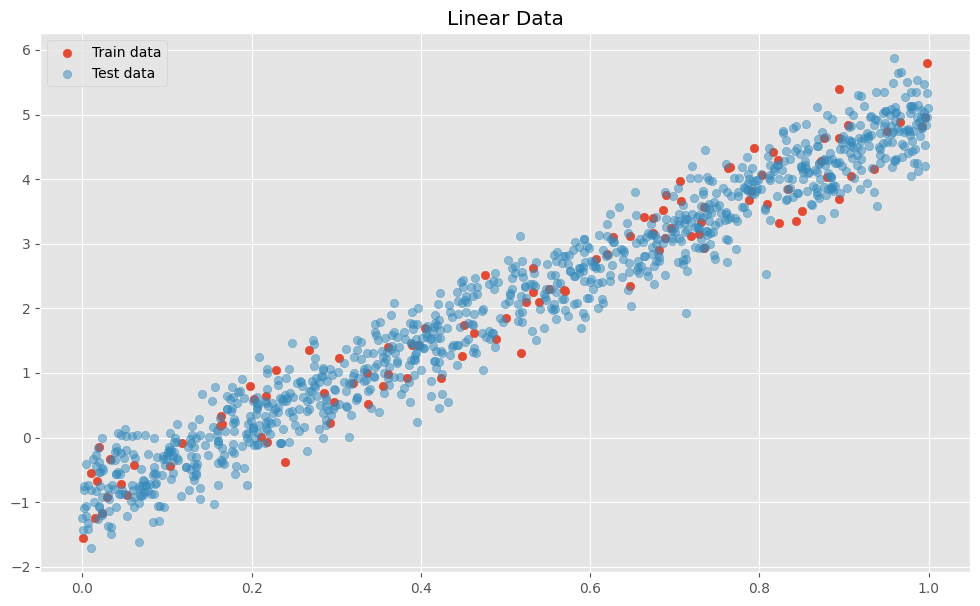

In [756]:
a = 6.
b = -1.
train_size = 100
test_size = 1000
sigma = 0.4 

X_train, y_train, X_test, y_test = dg.generate_linear_data(a, b, sigma, train_size, test_size)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
dg.plot_data(X_train, y_train, X_test, y_test, title='Linear Data', alpha_train=1, alpha_test=0.5)

## Model, loss and optimizer

In [757]:
model = Linear(1,1, use_bias=True)
loss = MSE()
train_loss, val_loss = SDG.step(
    model, loss, X_train=X_train, y_train=y_train, 
    epochs=100, lr=1e-2, batch_size=10, verbose=True,
)

Epoch 0 : Train loss : 0.8747703856633511 - Val loss : None
Epoch 10 : Train loss : 0.16669309329012472 - Val loss : None
Epoch 20 : Train loss : 0.16461993139549672 - Val loss : None
Epoch 30 : Train loss : 0.16461252068111173 - Val loss : None
Epoch 40 : Train loss : 0.1646124511985426 - Val loss : None
Epoch 50 : Train loss : 0.16461245053534573 - Val loss : None
Epoch 60 : Train loss : 0.1646124505290146 - Val loss : None
Epoch 70 : Train loss : 0.16461245052895412 - Val loss : None
Epoch 80 : Train loss : 0.16461245052895349 - Val loss : None
Epoch 90 : Train loss : 0.16461245052895349 - Val loss : None
Model updated 1000 times.


In [758]:
model._parameters

{'weights': array([[6.01727152]]), 'bias': array([[-0.99561673]])}

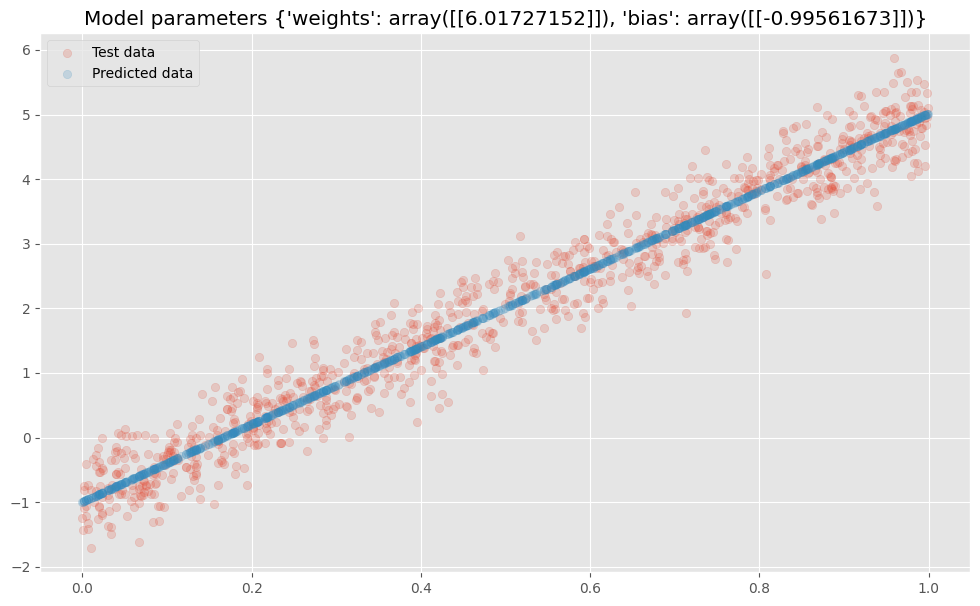

In [761]:
output = model.forward(X_test.reshape(-1,1))
title = f"Model parameters {model._parameters}"
dg.plot_data(X_test, y_test, X_test, output, title_train="Test data",title_test="Predicted data", title=title)